In [25]:
import pandas as pd
import numpy as np
import glob
import os

In [26]:
path = os.path.join('.','Sales_Data','*.csv')
filenames = glob.glob(path)
sales_per_month = []
for filename in filenames:
    sales_per_month.append(pd.read_csv(filename))
#concetinating all monthly DF to single DF
sale_year = pd.concat(sales_per_month,ignore_index=True)    

In [27]:
sale_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [28]:
sale_year.shape

(186850, 6)

In [29]:
sale_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [67]:
sale_year.to_csv('./Output/sales_year.csv',index=False) #saving to csv to avoid all merging part again 

# question 1 : what is the best month for sales? How much was earned that month

In [30]:
# checking datatypes for the columns, We can see Order Date is not date column we need to convert that
# also there are Price Each Quantity Ordered columns should be float instead of strings 
sale_year.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [31]:
# cheking if there are any nulls present in Order Date column before converting ot to datetime object
sale_year[sale_year['Order Date'].isnull()] 
# we see for all columns data is missing and these rows should be dropped 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
sale_year.dropna(how='all',inplace=True)

In [33]:
sale_year.shape

(186305, 6)

In [34]:
sale_year.isna().sum() # no null values for Quantity Ordered

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [35]:
pd.to_datetime(sale_year['Order Date'],format='%m/%d/%y %H:%M')

ValueError: time data 'Order Date' does not match format '%m/%d/%y %H:%M' (match)

# looks like there are some junk data in Order Date column checking where len of value of these column != 14

In [36]:
sale_year[sale_year['Order Date'].str.len()!=14]

# we see there are some rows who has these junk values in them we need to drop these 



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [37]:
# bad_rows will have index position to be deleted
bad_rows = sale_year[sale_year['Order Date'].str.len()!=14].index



In [38]:
# droping bad rows 
sale_year.drop(bad_rows,axis=0,inplace=True)

In [39]:
sale_year.shape

(185950, 6)

In [172]:
186305-185950  # 355 rows dropped

355

In [40]:
sale_year['Order Date'] = pd.to_datetime(sale_year['Order Date']) # these time conversion is sucessful

In [174]:
sale_year.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [41]:
# now converting data type Quantity Ordered and Price Each to float

sale_year = sale_year.astype({'Quantity Ordered':'float','Price Each':'float'})


In [178]:
sale_year.dtypes


Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [46]:
# creating new column as total_price = Quantity Ordered * Price Each
sale_year['total_price'] = sale_year['Quantity Ordered']*sale_year['Price Each']

In [183]:
sale_year.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
total_price                float64
dtype: object

In [47]:
#now calculating total sales per month 
np.set_printoptions(precision=3)
sale_year.groupby(sale_year['Order Date'].dt.month)['total_price'].sum().\
sort_values(ascending=False).head(1)

Order Date
12    4.613443e+06
Name: total_price, dtype: float64

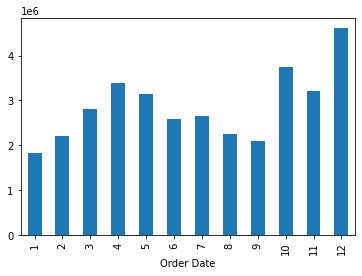

In [195]:
sale_year.groupby(sale_year['Order Date'].dt.month)['total_price'].sum().sort_index().plot(kind='bar')

##### what us city had the highest number of sales

In [197]:
sale_year.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
total_price                float64
dtype: object

In [198]:
sale_year.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95


In [48]:
sale_year['City'] = sale_year['Purchase Address'].str.split(',').str[1]

In [49]:
sale_year.groupby('City').total_price.sum().sort_values().tail()

City
 Atlanta          2.795499e+06
 Boston           3.661642e+06
 New York City    4.664317e+06
 Los Angeles      5.452571e+06
 San Francisco    8.262204e+06
Name: total_price, dtype: float64

In [206]:
df = sale_year[sale_year['Order ID'].duplicated(keep=False)]

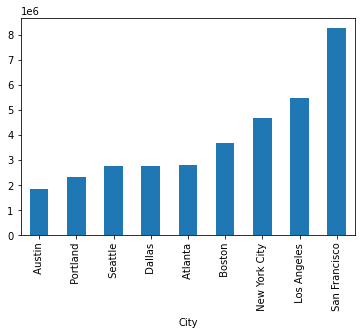

In [50]:
sale_year.groupby('City').total_price.sum().sort_values().plot(kind='bar')

In [54]:
sale_year.loc[sale_year['Order ID']=='295681',:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,City
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",600.00,Boston
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.95,Boston
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",99.99,Boston
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.99,Boston


In [58]:
df = sale_year[sale_year['Order ID'].duplicated(keep=False)].copy()

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,City,Grouped
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",600.00,Boston,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.95,Boston,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",99.99,Boston,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.99,Boston,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",400.00,New York City,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1.0,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",3.84,Los Angeles,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,Google Phone,1.0,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",600.00,New York City,"Google Phone,USB-C Charging Cable"
186823,222884,USB-C Charging Cable,1.0,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",11.95,New York City,"Google Phone,USB-C Charging Cable"
186842,222903,iPhone,1.0,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",700.00,New York City,"iPhone,Lightning Charging Cable"


In [63]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [66]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

#print(count.most_common(10)) 

for key, value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [219]:
for key, value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
